This notebook guides you through the ISLES22 data loading, visualization, and segmentation performance evaluation.

In [3]:
# imports.
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt
import eval_utils

In [30]:
# paths.
isles_data_dir = '/Users/raphaelbenichou/Downloads/Dataset001_ISLES22forUNET'


# Set images path.
dwi_path = os.path.join(isles_data_dir,'imagesTr/ISLES_249_0001.nii.gz')
adc_path = os.path.join(isles_data_dir, 'imagesTr/ISLES_249_0002.nii.gz')
flair_path = os.path.join(isles_data_dir, 'imagesTr/ISLES_249_0000.nii.gz')
mask_path = os.path.join(isles_data_dir, 'labelsTr/ISLES_249.nii.gz')

In [31]:
# Load image data.
dwi_image = nib.load(dwi_path).get_fdata()
adc_image = nib.load(adc_path).get_fdata()
flair_image = nib.load(flair_path).get_fdata()
mask_image = nib.load(mask_path).get_fdata()

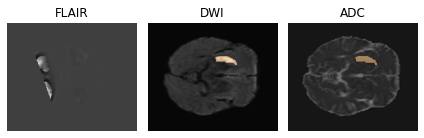

In [32]:
# Lets visualize the MR images with their corresponding mask overlays.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Show FLAIR image.
ax1.imshow(flair_image[:,:,16], cmap='gray')
ax1.set_title('FLAIR')
ax1.set_axis_off()

slice2show=70
# Show DWI image w/overlayed mask.
ax2.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax2.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax2.set_title('DWI')
ax2.set_axis_off()

# Show ADC image w/overlayed mask.
ax3.imshow(adc_image[:,:,slice2show], cmap='gray')
ax3.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax3.set_title('ADC')
ax3.set_axis_off()
plt.tight_layout()
plt.show()

In [28]:
# As an example, we'll segment the DWI using a 99th-percentile intensity cutoff. 
dwi_cutoff = np.percentile(dwi_image[dwi_image>0], 99) 
segmented_image = dwi_image > dwi_cutoff

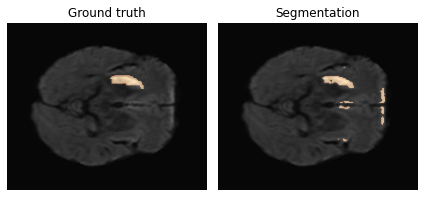

In [33]:
# Lets visualize the segmentation we've created.
# Show ground truth.
fig2, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax1.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax1.set_title('Ground truth')
ax1.set_axis_off()

# Show predicted segmentation.
ax2.imshow(dwi_image[:,:,slice2show], cmap='gray')
ax2.imshow(segmented_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax2.set_title('Segmentation')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

In [34]:
# Compute performance metrics.
# Compute dice
print('Dice score: {}'.format(eval_utils.compute_dice(mask_image, segmented_image)))

# Compute absolute volume difference
voxel_volume = np.prod(nib.load(dwi_path).header.get_zooms())/1000 # Get voxel volume
print('Absolute volume difference: {} ml'.format(eval_utils.compute_absolute_volume_difference(mask_image, segmented_image, voxel_volume)))

# Compute absolute lesion count difference
print('Absolute lesion count difference: {} '.format(eval_utils.compute_absolute_lesion_difference(mask_image, segmented_image)))

# Compute F1-score (lesion-wise)
print('Lesion-wise F1-score: {} '.format(eval_utils.compute_lesion_f1_score(mask_image, segmented_image)))

Dice score: 0.6031475677885271
Absolute volume difference: 7.366 ml
Absolute lesion count difference: 98 
Lesion-wise F1-score: 0.02 
